In [1]:
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
enron_data = pickle.load(open("final_project_dataset.pkl", "rb"))

In [3]:
enron_data = pd.DataFrame.from_dict(enron_data, orient="index")

In [4]:
#Converting to numpy NaN
for column in enron_data.columns:
    enron_data[column] = enron_data[column].apply(lambda x: np.NaN if x == 'NaN' else x)

In [5]:
enron_data.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,9.500000e+01,86.000000,3.900000e+01,1.250000e+02,4.000000e+00,8.200000e+01,1.800000e+01,4.900000e+01,1.260000e+02,9.500000e+01,86.000000,1.020000e+02,86.000000,9.300000e+01,86.000000,6.600000e+01,86.000000,1.100000e+02,1.700000e+01
mean,5.621943e+05,2073.860465,1.642674e+06,5.081526e+06,4.196250e+07,2.374235e+06,1.664106e+05,-1.140475e+06,6.773957e+06,1.087289e+05,64.895349,5.987054e+06,608.790698,9.190650e+05,41.232558,1.470361e+06,1176.465116,2.321741e+06,1.668049e+05
std,2.716369e+06,2582.700981,5.161930e+06,2.906172e+07,4.708321e+07,1.071333e+07,4.201494e+06,4.025406e+06,3.895777e+07,5.335348e+05,86.979244,3.106201e+07,1841.033949,4.589253e+06,100.073111,5.942759e+06,1178.317641,1.251828e+07,3.198914e+05
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,4.000000e+05,7.000000e+04,-7.576788e+06,-2.799289e+07,-4.409300e+04,1.480000e+02,0.000000,3.285000e+03,12.000000,2.000000e+00,0.000000,6.922300e+04,2.000000,-2.604490e+06,3.285000e+03
25%,2.118160e+05,541.250000,8.157300e+04,3.944750e+05,1.600000e+06,4.312500e+05,-3.896218e+05,-6.948620e+05,4.945102e+05,2.261400e+04,10.000000,5.278862e+05,22.750000,1.215000e+03,1.000000,2.812500e+05,249.750000,2.540180e+05,9.878400e+04
50%,2.599960e+05,1211.000000,2.274490e+05,1.101393e+06,4.176250e+07,7.693750e+05,-1.469750e+05,-1.597920e+05,1.102872e+06,4.695000e+04,35.000000,1.310814e+06,41.000000,5.238200e+04,8.000000,4.420350e+05,740.500000,4.517400e+05,1.085790e+05
75%,3.121170e+05,2634.750000,1.002672e+06,2.093263e+06,8.212500e+07,1.200000e+06,-7.500975e+04,-3.834600e+04,2.949847e+06,7.995250e+04,72.250000,2.547724e+06,145.500000,3.620960e+05,24.750000,9.386720e+05,1888.250000,1.002370e+06,1.137840e+05
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,8.392500e+07,9.734362e+07,1.545629e+07,-8.330000e+02,4.345095e+08,5.235198e+06,528.000000,3.117640e+08,14368.000000,4.266759e+07,609.000000,4.852193e+07,5521.000000,1.303223e+08,1.398517e+06


In [6]:
enron_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   email_address              111 non-null    object 
 7   restricted_stock_deferred  18 non-null     float64
 8   deferred_income            49 non-null     float64
 9   total_stock_value          126 non-null    float64
 10  expenses                   95 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    102 non-null    float64
 13  from_messages              86 non-

In [7]:
#Segregating Features
financialFeatures = ['salary','bonus', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi',
                     'total_payments', 'expenses', 'total_stock_value', 'deferred_income', 'long_term_incentive']
behavioralFeatures = ['to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other']
allFeatures = ['poi','salary','bonus', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi',
               'total_payments', 'expenses', 'total_stock_value', 'deferred_income', 'long_term_incentive',
               'to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other']

In [8]:
#filling empty values with 0
enron_data.fillna(0,inplace=True)
enron_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     146 non-null    float64
 1   to_messages                146 non-null    float64
 2   deferral_payments          146 non-null    float64
 3   total_payments             146 non-null    float64
 4   loan_advances              146 non-null    float64
 5   bonus                      146 non-null    float64
 6   email_address              146 non-null    object 
 7   restricted_stock_deferred  146 non-null    float64
 8   deferred_income            146 non-null    float64
 9   total_stock_value          146 non-null    float64
 10  expenses                   146 non-null    float64
 11  from_poi_to_this_person    146 non-null    float64
 12  exercised_stock_options    146 non-null    float64
 13  from_messages              146 non

In [9]:
#Dropping rows which do not belong to individuals
enron_data = enron_data.drop("TOTAL")
enron_data = enron_data.drop("THE TRAVEL AGENCY IN THE PARK")

In [10]:
#Identifying Outliers
#Counting the number of outlying features for each individual
IQR = enron_data.quantile(q=0.75) - enron_data.quantile(q=0.25)
first_quartile = enron_data.quantile(q=0.25)
third_quartile = enron_data.quantile(q=0.75)
outliers = enron_data[(enron_data>(third_quartile + 1.5*IQR) ) | (enron_data<(first_quartile - 1.5*IQR) )].count(axis=1)
outliers.sort_values(axis=0, ascending=False, inplace=True)
outliers.head(12)

LAY KENNETH L         15
FREVERT MARK A        12
BELDEN TIMOTHY N      10
BAXTER JOHN C          8
SKILLING JEFFREY K     8
LAVORATO JOHN J        8
HAEDICKE MARK E        7
WHALLEY LAWRENCE G     7
KEAN STEVEN J          7
RICE KENNETH D         6
BUY RICHARD B          6
ALLEN PHILLIP K        6
dtype: int64

This reveals some surprising insights as these are the individuals which have been identified as POI's.

In [11]:
#removing those inviduals which are not POI's
enron_data.drop(axis=0, labels=['FREVERT MARK A', 'LAVORATO JOHN J', 'WHALLEY LAWRENCE G', 'BAXTER JOHN C'], inplace=True)

In [12]:
#poi count is maintained so that class imbalance does not increase.
enron_data['poi'].value_counts()

False    122
True      18
Name: poi, dtype: int64

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(enron_data, test_size=0.3, random_state=42, stratify=enron_data['poi']) 
# 100 - 44 split

In [14]:
enron_data['poi'] = enron_data['poi'].apply(lambda x: int(x))
trainData['poi'] = trainData['poi'].apply(lambda x: int(x))
testData['poi'] = testData['poi'].apply(lambda x: int(x))

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


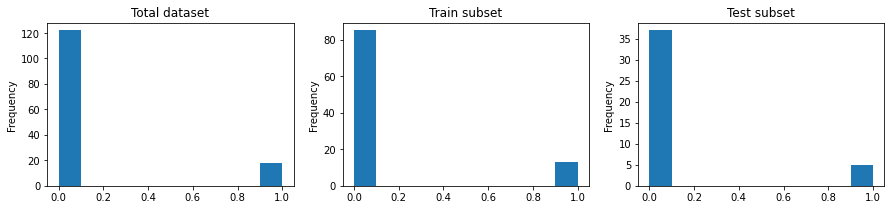

In [15]:
## Evaluating the class distribution:
fig2, axes2 = plt.subplots(1,3,figsize=(15,3), sharex=False);
enron_data['poi'].plot(kind='hist', ax=axes2[0], title='Total dataset');
trainData['poi'].plot(kind='hist', ax=axes2[1], title='Train subset');
testData['poi'].plot(kind='hist', ax=axes2[2], title='Test subset');

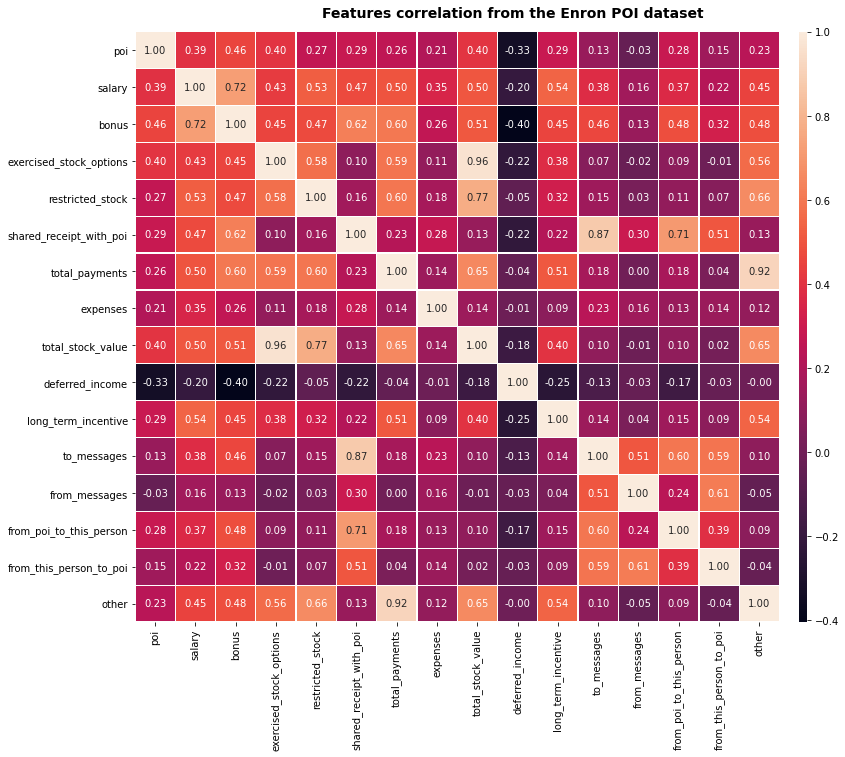

In [16]:
## Calculating the correlation among features by Pearson method
correlationDataframe = enron_data[allFeatures].corr()

# Drawing a heatmap with the numeric values in each cell
fig1, ax = plt.subplots(figsize=(14,10))
fig1.subplots_adjust(top=.945)
plt.suptitle('Features correlation from the Enron POI dataset', fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"vertical", 'pad':0.025, 'aspect':70}
sns.heatmap(correlationDataframe, annot=True, fmt='.2f', linewidths=.3, ax=ax, cbar_kws=cbar_kws);

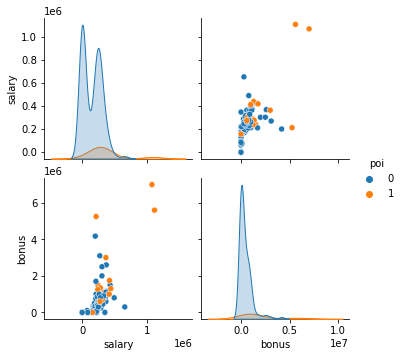

In [17]:
#financialFeatures
pca = PCA(n_components=1)
pca.fit(enron_data[financialFeatures])
pcaComponents = pca.fit_transform(enron_data[financialFeatures])
enron_data['financial'] = pcaComponents
sns.pairplot(enron_data,hue='poi',vars=['salary','bonus'], diag_kind='kde');

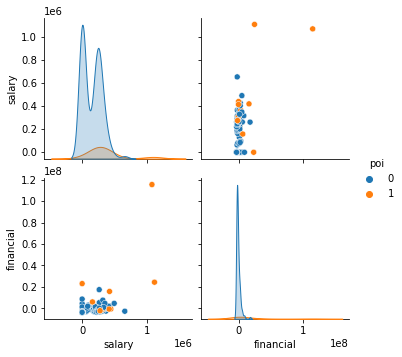

In [18]:
sns.pairplot(enron_data,hue='poi',vars=['salary','financial'], diag_kind='kde');

In [19]:
allFeatures.append('financial')
financialFeatures.append('financial')
allFeatures

['poi',
 'salary',
 'bonus',
 'exercised_stock_options',
 'restricted_stock',
 'shared_receipt_with_poi',
 'total_payments',
 'expenses',
 'total_stock_value',
 'deferred_income',
 'long_term_incentive',
 'to_messages',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'financial']

In [20]:
from sklearn.feature_selection import SelectPercentile, f_classif

selectorDataset = enron_data[financialFeatures]
selectorLabel = enron_data['poi']

selector = SelectPercentile(f_classif, percentile=5)
selector.fit(selectorDataset, selectorLabel)

SelectPercentile(percentile=5)

<BarContainer object of 11 artists>

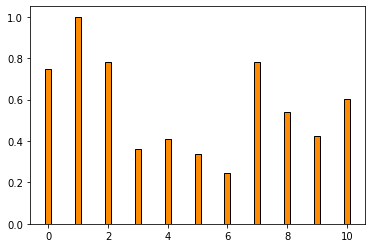

In [21]:
## Plotting the features selection: 
X_indices = np.arange(selectorDataset.shape[-1])
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

In [22]:
## Printing out the selected financial features: 
selectedFeatures = ['poi']  
for ix, pval in enumerate(scores):
    print(financialFeatures[ix],': ',pval)
    if (pval >= 0.45):
        selectedFeatures.append(financialFeatures[ix])

salary :  0.7486604724185494
bonus :  1.0
exercised_stock_options :  0.7825184931891351
restricted_stock :  0.36178572905407935
shared_receipt_with_poi :  0.4109282383903554
total_payments :  0.33711927929094504
expenses :  0.24367217636735955
total_stock_value :  0.7804242761108391
deferred_income :  0.539912784208051
long_term_incentive :  0.42291453409649854
financial :  0.6041931417437564


In [23]:
selectedFeatures

['poi',
 'salary',
 'bonus',
 'exercised_stock_options',
 'total_stock_value',
 'deferred_income',
 'financial']

In [24]:
strategicFeatures = ['poi'] + behavioralFeatures + ['financial']
strategicFeatures

['poi',
 'to_messages',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'financial']

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(enron_data[allFeatures])
enron_data[allFeatures] = scaler.transform(enron_data[allFeatures])

In [26]:
def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """
    return_list = []
    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )
    return np.array(return_list)

def targetFeatureSplit( data ):
    """ given a numpy array like the one returned from featureFormat, separate out the first feature and put it into its own list
    (this should be the quantity you want to predict) return targets and features as separate lists (sklearn can generally 
    handle both lists and numpy arrays as input formats when training/predicting) """
    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )
    return target, features

In [27]:
evaluation = enron_data.to_dict(orient='index')
features_list = selectedFeatures
#features_list = strategicFeatures

### Extract features and labels from dataset
data = featureFormat(evaluation, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [28]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_parameters = {}

In [30]:
from sklearn.model_selection import GridSearchCV

clf_nb = GridSearchCV(nb, nb_parameters)
clf_nb.fit(features_train, labels_train)

GridSearchCV(estimator=GaussianNB(), param_grid={})

In [31]:
from sklearn.metrics import classification_report
def evaluateClassif(clf):
    classes=['Non-POI','POI']  ## Defining the classes labels
    predTrain = clf.predict(features_train)
    print('################### Training data ##################')
    print(classification_report(labels_train, predTrain, target_names=classes))
    
    predTest = clf.predict(features_test)
    print('################### Testing data ###################')
    print(classification_report(labels_test, predTest, target_names=classes))
    
    return

In [32]:
evaluateClassif(clf_nb)

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       0.92      0.97      0.94        86
         POI       0.62      0.42      0.50        12

    accuracy                           0.90        98
   macro avg       0.77      0.69      0.72        98
weighted avg       0.89      0.90      0.89        98

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.94      0.92      0.93        36
         POI       0.57      0.67      0.62         6

    accuracy                           0.88        42
   macro avg       0.76      0.79      0.77        42
weighted avg       0.89      0.88      0.88        42



In [33]:
## A macro-average will compute the metric independently for each class and then take the average (hence treating all classes 
## equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric.

## Weighted average is a calculation that takes into account the varying degrees of importance of the numbers in a data set.